# Import the main libiraries

In [1]:
# Most important libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


#data set load to notebook

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data1 = data.copy()

# inspect the Data

In [3]:
#all columns data type, unique valu,null value

def coldata(df):
    l = []
    columns = data.columns
    for col in columns:
        dtypes = df[col].dtypes
        nunique = df[col].nunique()
        null_value = df[col].isnull().sum()
        l.append([col,dtypes,nunique,null_value])
    df_chek = pd.DataFrame(l)
    df_chek.columns =['Columns','Dtype','Unique','null_value'] 
    return df_chek
coldata(data1)

,Columns,Dtype,Unique,null_value
0,car_ID,int64,205,0
1,symboling,int64,6,0
2,CarName,object,147,0
3,fueltype,object,2,0
4,aspiration,object,2,0
5,doornumber,object,2,0
6,carbody,object,5,0
7,drivewheel,object,3,0
8,enginelocation,object,2,0
9,wheelbase,float64,53,0


In [4]:
# in the row no null value is thier

In [5]:

# 1st 5 row see or head()
data1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
## Some statistics on data or 5 point summery
data1.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Check the Duplicates in dataset #no duplicate data
data1.duplicated().sum()

0

array([[<AxesSubplot: title={'center': 'symboling'}>,
        <AxesSubplot: title={'center': 'wheelbase'}>,
        <AxesSubplot: title={'center': 'carlength'}>,
        <AxesSubplot: title={'center': 'carwidth'}>],
       [<AxesSubplot: title={'center': 'carheight'}>,
        <AxesSubplot: title={'center': 'curbweight'}>,
        <AxesSubplot: title={'center': 'enginesize'}>,
        <AxesSubplot: title={'center': 'boreratio'}>],
       [<AxesSubplot: title={'center': 'stroke'}>,
        <AxesSubplot: title={'center': 'compressionratio'}>,
        <AxesSubplot: title={'center': 'horsepower'}>,
        <AxesSubplot: title={'center': 'peakrpm'}>],
       [<AxesSubplot: title={'center': 'citympg'}>,
        <AxesSubplot: title={'center': 'highwaympg'}>,
        <AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >]],
      dtype=object)

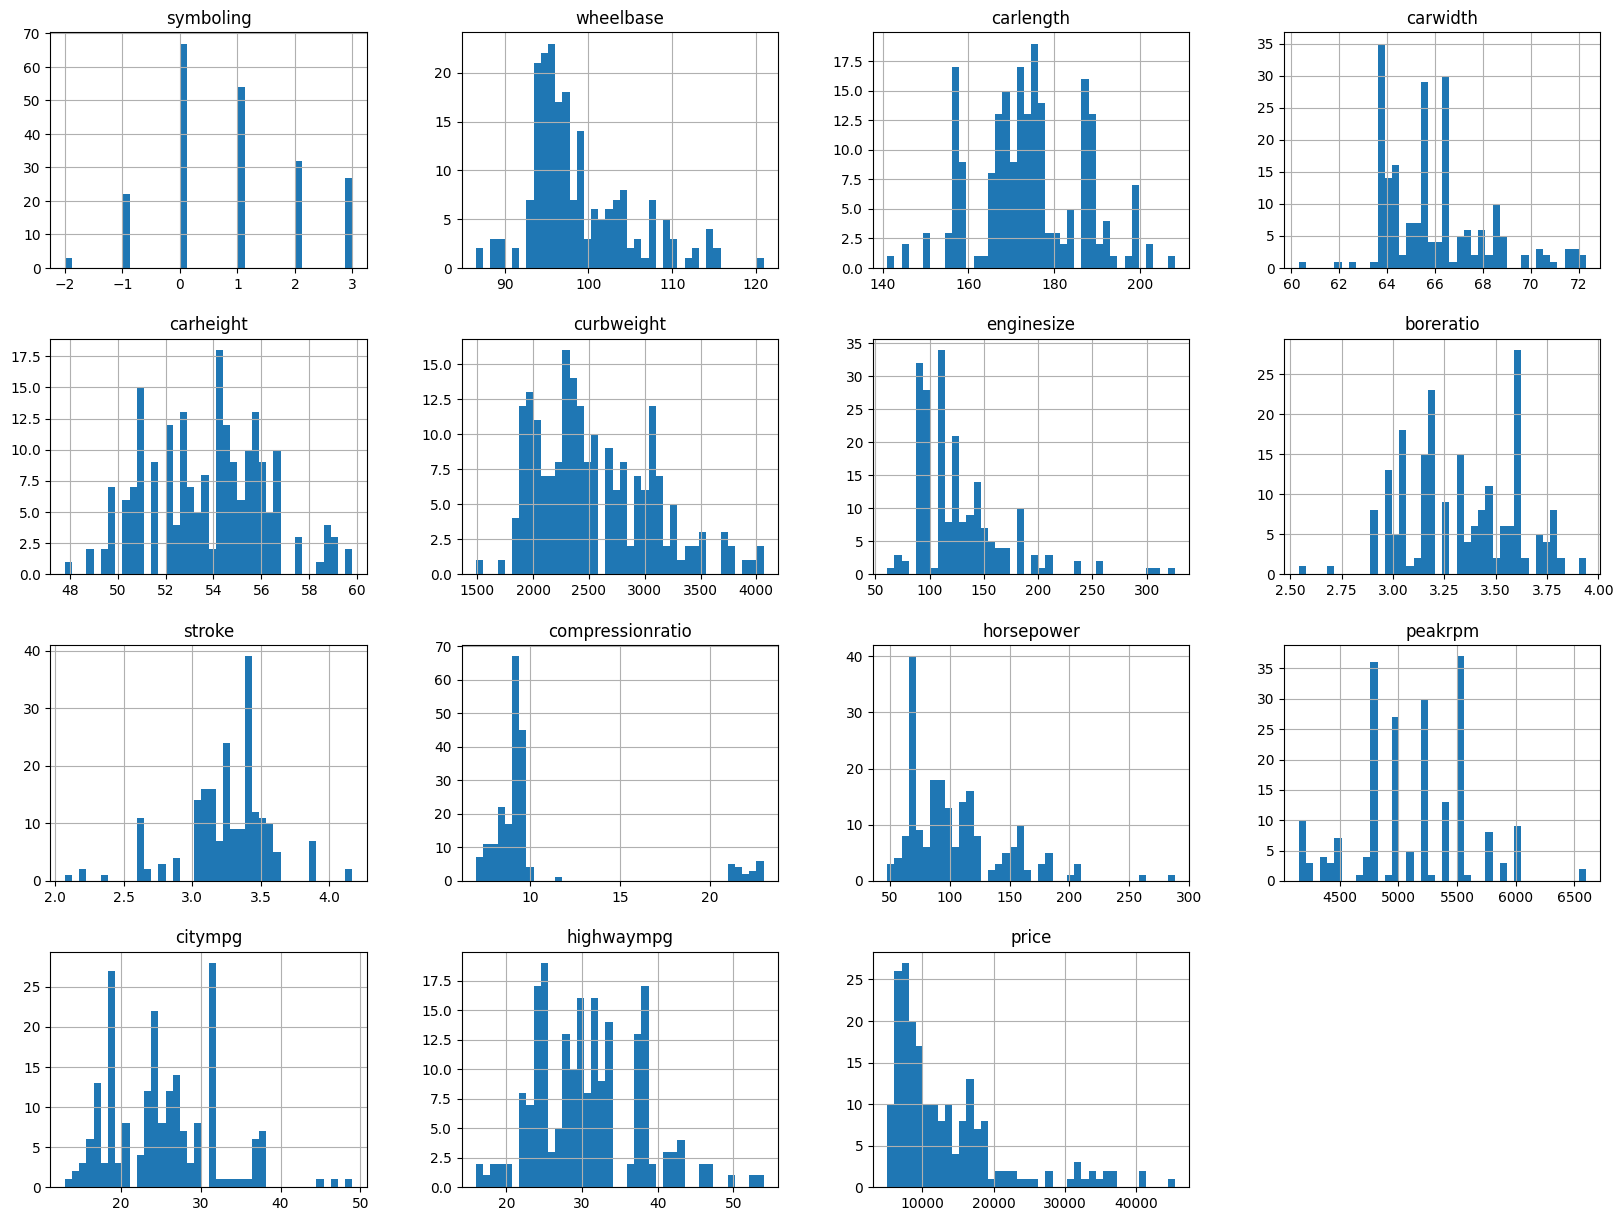

In [8]:
data1.drop('car_ID',axis=1,inplace=True)
# Histogram to all columns
data1.hist(bins = 40,figsize=(20,15))
# sns.distplot(data1)
# sns.displot(data1)


In [9]:
# Get the main names of cars
data1['CarName'] = data1['CarName'].str.split(' ',expand = True)[0]
data1.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
#  Fix the mistakes in cars names 
data1['CarName'] = data1['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [11]:
# Unique names of cars after updating
data1.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
# Select the categorical columns
categorial_col = data1.select_dtypes(include= ['object']).columns

In [13]:
# print all the unique values of all categorical columns
for i in categorial_col:
    print(i,'unique values')
    print('-----------------------------------')
    print(data1[i].unique())
    print('-----------------------------------------------------------------------------')


CarName unique values
-----------------------------------
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
-----------------------------------------------------------------------------
fueltype unique values
-----------------------------------
['gas' 'diesel']
-----------------------------------------------------------------------------
aspiration unique values
-----------------------------------
['std' 'turbo']
-----------------------------------------------------------------------------
doornumber unique values
-----------------------------------
['two' 'four']
-----------------------------------------------------------------------------
carbody unique values
-----------------------------------
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
-----------------------------------------------------------------------------


In [14]:
le = LabelEncoder()
data1.CarName = le.fit_transform(data1.CarName)
data1.fueltype = le.fit_transform(data1.fueltype)
data1.aspiration = le.fit_transform(data1.aspiration)
data1.doornumber = le.fit_transform(data1.doornumber)
data1.drivewheel = le.fit_transform(data1.drivewheel)
data1.enginelocation = le.fit_transform(data1.enginelocation)
data1.enginetype = le.fit_transform(data1.enginetype)
data1.cylindernumber = le.fit_transform(data1.cylindernumber)
data1.fuelsystem = le.fit_transform(data1.fuelsystem)

# you can use thid type also
# le = LabelEncoder()
# df_cars['CarName'] = le.fit_transform(df_cars['CarName'])
# df_cars['fueltype'] = le.fit_transform(df_cars['fueltype'])
# df_cars['aspiration'] = le.fit_transform(df_cars['aspiration'])
# df_cars['doornumber'] = le.fit_transform(df_cars['doornumber'])
# df_cars['carbody'] = le.fit_transform(df_cars['carbody'])
# df_cars['drivewheel'] = le.fit_transform(df_cars['drivewheel'])
# df_cars['enginelocation'] = le.fit_transform(df_cars['enginelocation'])
# df_cars['enginetype'] = le.fit_transform(df_cars['enginetype'])
# df_cars['cylindernumber'] = le.fit_transform(df_cars['cylindernumber'])
# df_cars['fuelsystem'] = le.fit_transform(df_cars['fuelsystem'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1396\2008367066.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = data1.corr()


<AxesSubplot: >

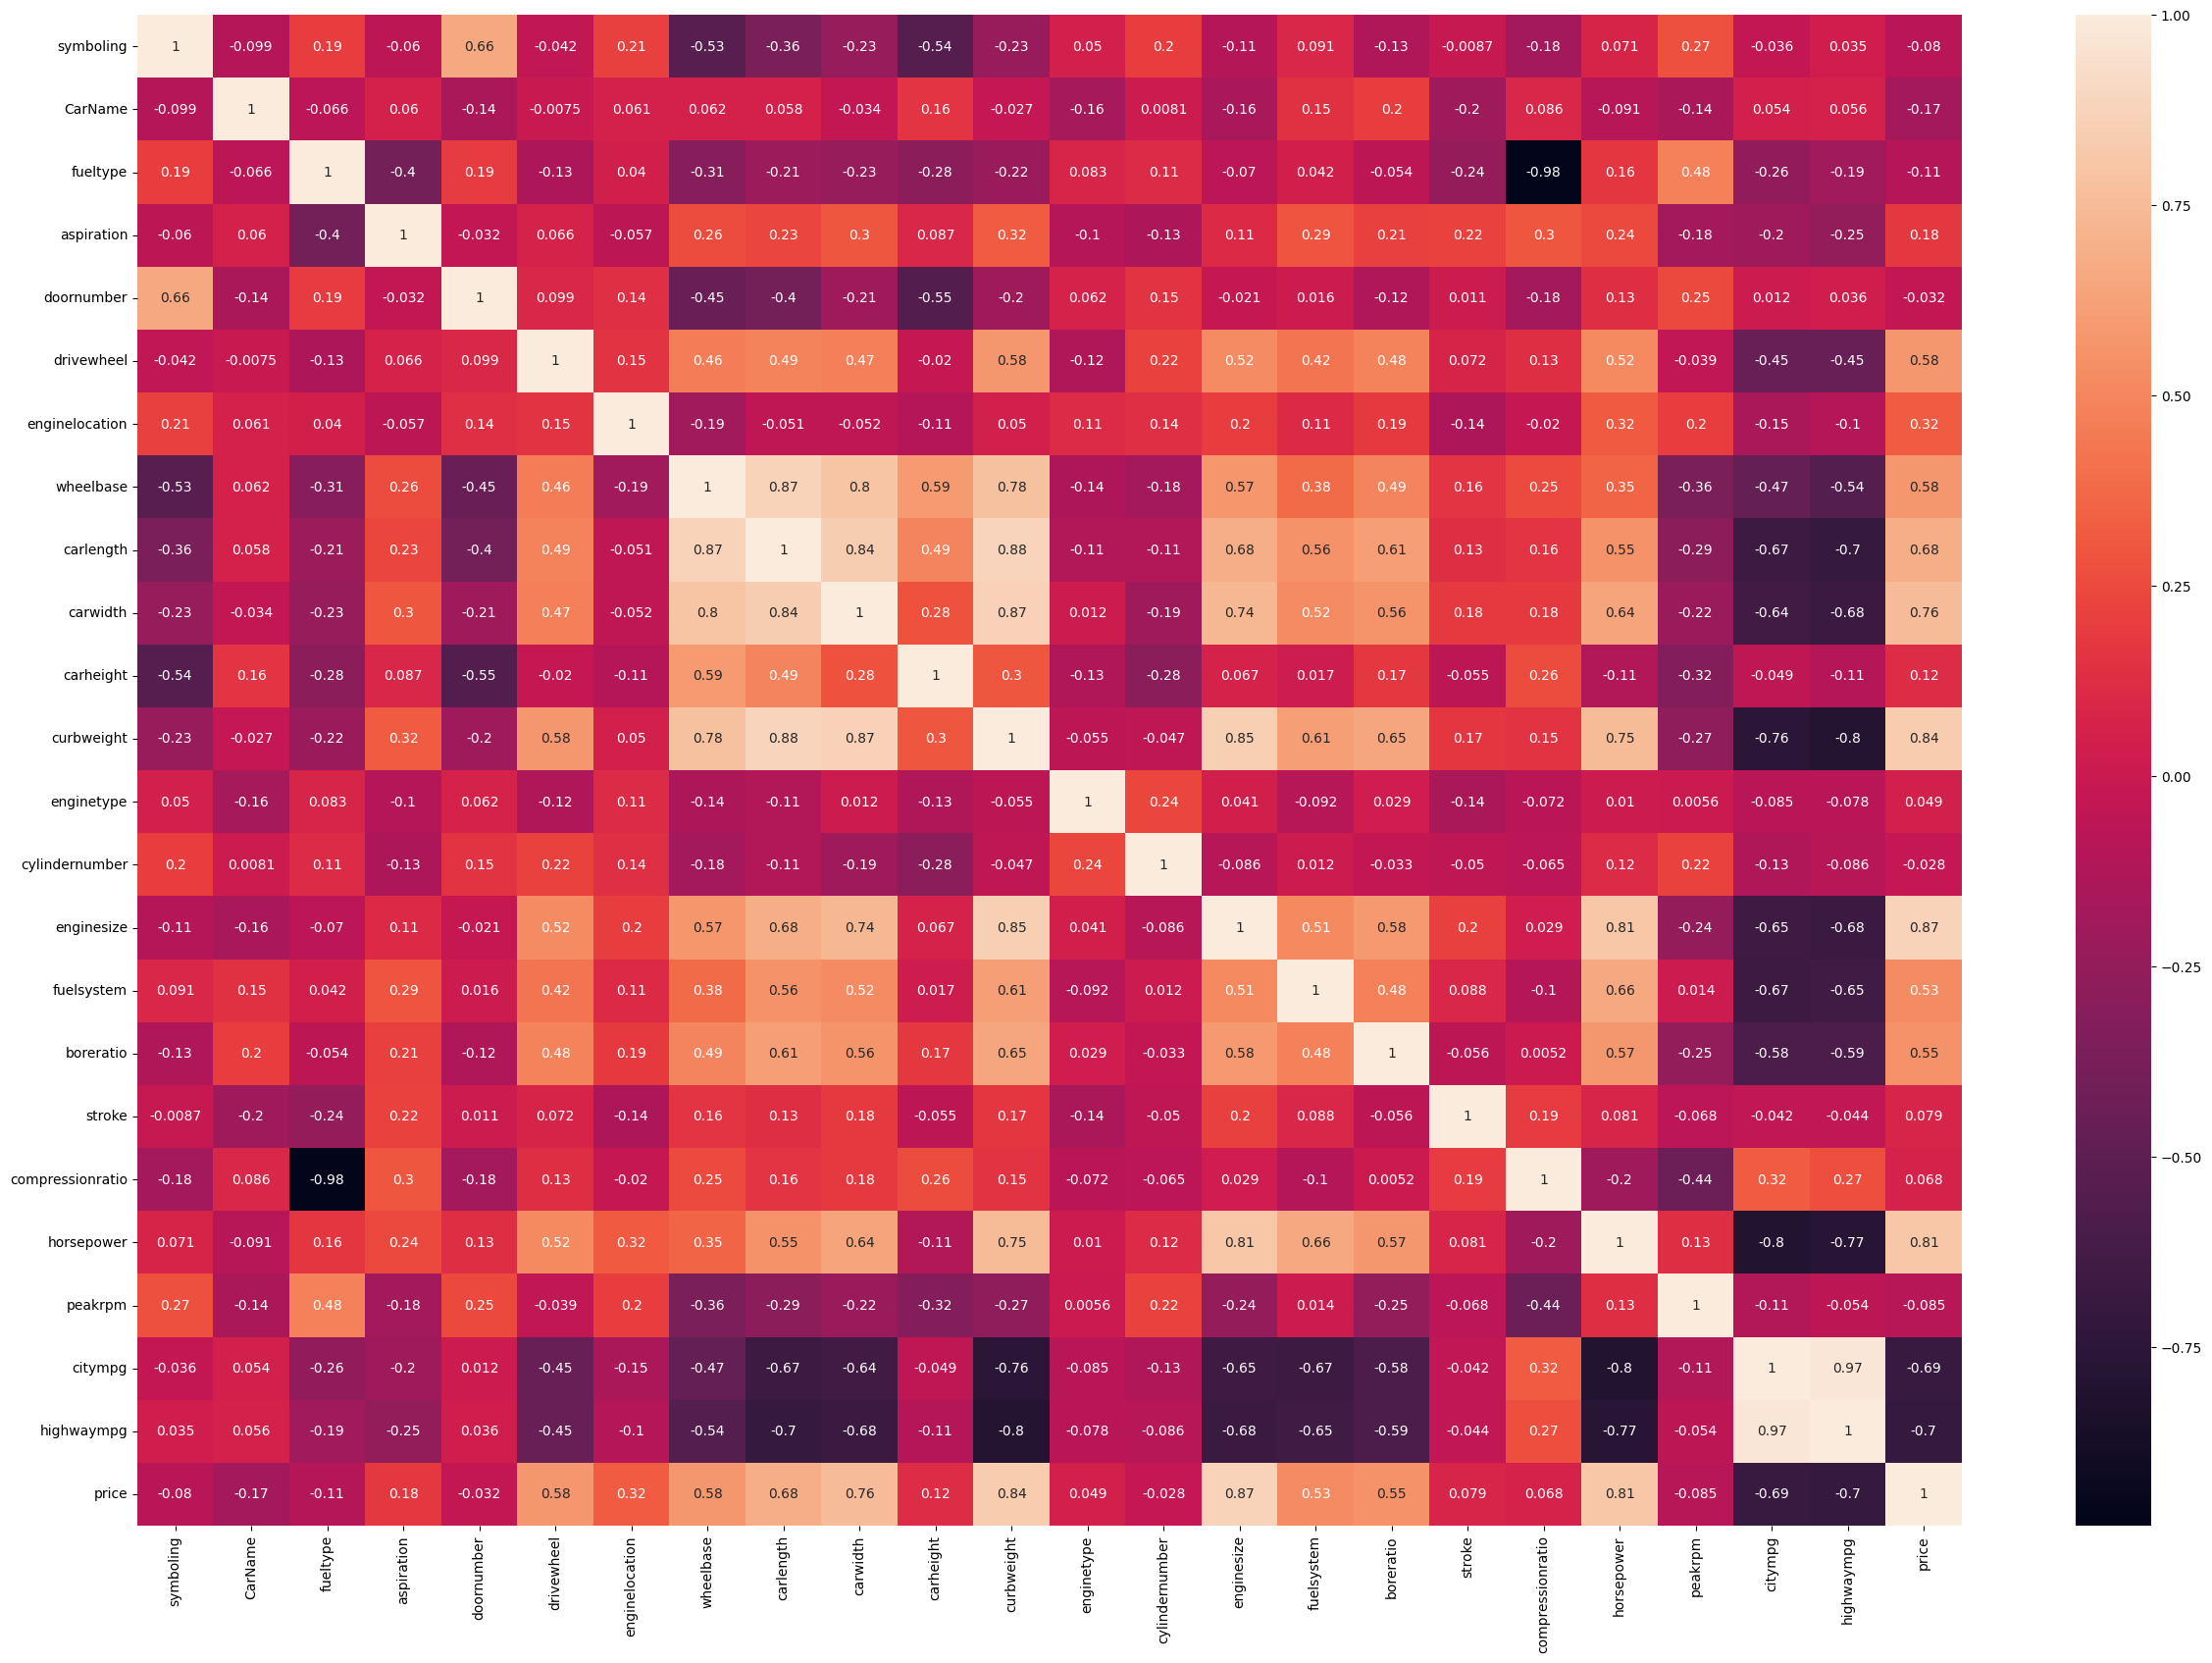

In [15]:
plt.figure(figsize=(30,20))
c = data1.corr()
sns.heatmap(c,annot=True)

# Comment 
>  Price has high correlation with{wheelbase , carlength , carwidth , curbweight , enginesize , boreratio , horsepower , citympg , highwaympg , drivewheel , fuelsystem }

# Train Test Split 

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
# split the data to x and y
# y is the terget value in this case the terget value is price 
# x contain the values of the rest of columns
cars = data1[['wheelbase' , 'carlength' , 'carwidth' , 'curbweight' , 
                'enginesize' ,'boreratio' , 'horsepower' , 'citympg' ,
                'highwaympg' , 'drivewheel' , 'fuelsystem','price' ]] 
x = cars.drop('price',axis=1).values
y = cars['price'].values

# x = cars.drop('price',axis=1).values
# y = cars['price'].values

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=32)


# Data scaling using robust regression

In [24]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear regression model

In [26]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [27]:
lreg.score(x_train,y_train)

0.8332921305865075

In [30]:
lreg.score(x_test,y_test)

0.7129636289438522

In [31]:
lreg.intercept_

11450.133838751108

In [32]:
lreg.coef_

array([ -423.15255075,   -55.24257622,  1444.69305223,  2387.76524796,
        3658.35424923, -1156.07083649,  2020.64449837, -3046.20920225,
        1850.01384378,  1805.79941385,  -899.0542492 ])

In [35]:
pd.DataFrame(lreg.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
wheelbase,-423.152551
carlength,-55.242576
carwidth,1444.693052
curbweight,2387.765248
enginesize,3658.354249
boreratio,-1156.070836
horsepower,2020.644498
citympg,-3046.209202
highwaympg,1850.013844
drivewheel,1805.799414


In [38]:
y_pred_1 = lreg.predict(x_test)
y_pred_1

array([ 9325.48293086, 20383.16430362,  7629.91127582,  6748.50772083,
        8405.83711617,  9972.75295268,  7665.53309338,  9000.58722497,
        9771.39864912, 23012.28354171, 16101.53146708,  8566.86973086,
        6268.82712633, 12332.57509309, 11676.31946646,  9766.54430207,
       10531.90000107,  -155.33809968, 23556.61329209, 10315.87189091,
       23532.12830237,  8752.36684376, 31283.27671907, 11934.13347839,
       23329.30778749,  6163.43434548,  6171.50724988,  9642.30415989,
        6246.75993839,  7661.52362273, 14144.81469392, 19246.86225739,
       26440.1123806 , 10022.40711956, 12720.61998033, 12049.91507868,
       16849.02839531, 16802.27566855,  8476.73247293, 16737.42233211,
       11071.81474275, 12882.88820875, 13611.89969555, 12751.96208138,
        8099.54798185, 24760.64751488,  6384.23237213, 19216.30091956,
       40106.22711512, 20473.44111925, 18722.78778224,  8047.1775309 ])

In [42]:
df_1 = pd.DataFrame({"y_test":y_test,'y_pred':y_pred_1})
# df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [43]:
df_1.head(10)

,y_test,y_pred
0,11259.0,9325.482931
1,22470.0,20383.164304
2,6692.0,7629.911276
3,7603.0,6748.507721
4,7995.0,8405.837116
5,8558.0,9972.752953
6,7349.0,7665.533093
7,7609.0,9000.587225
8,9960.0,9771.398649
9,21485.0,23012.283542


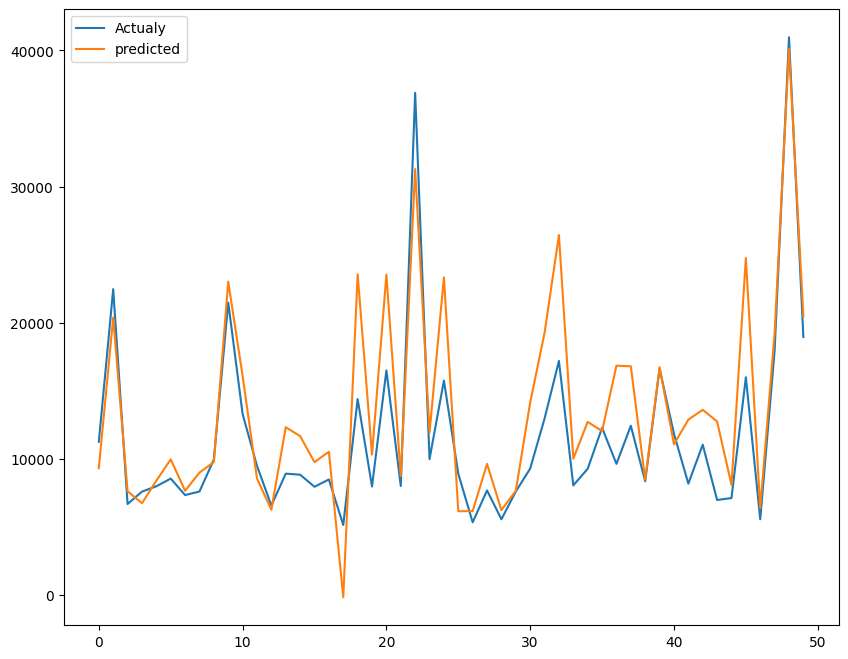

In [44]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);

# Ridge Model


In [63]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=0.9)
# rid = Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [64]:
rid.score(x_train,y_train)
# rid.score(x_train,y_train)

0.8329826720257039

In [65]:
rid.score(x_test,y_test)
# rid.score(x_test,y_test)

0.7068551614035963

In [66]:
rid.intercept_

11460.294936694567

In [67]:
rid.coef_

array([ -417.5077994 ,    51.80217254,  1434.51621346,  2142.28559709,
        3611.4885023 , -1088.42321923,  2162.14457219, -1956.98182924,
         867.28128836,  1783.88960011,  -813.80606322])

In [68]:
pd.DataFrame(rid.coef_,cars.columns[:-1],columns=['coeficients'])

# pd.DataFrame(rid.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
wheelbase,-417.507799
carlength,51.802173
carwidth,1434.516213
curbweight,2142.285597
enginesize,3611.488502
boreratio,-1088.423219
horsepower,2162.144572
citympg,-1956.981829
highwaympg,867.281288
drivewheel,1783.889600


In [69]:
y_pred_2 = rid.predict(x_test)

In [70]:
df_2 = pd.DataFrame({"y_test":y_test,"y_pred":y_pred_2})


In [71]:
df_2.head(10)

,y_test,y_pred
0,11259.0,9612.219101
1,22470.0,20706.932402
2,6692.0,7436.447526
3,7603.0,6799.522603
4,7995.0,7848.986960
5,8558.0,10035.581107
6,7349.0,7611.812806
7,7609.0,8730.060557
8,9960.0,9904.301550
9,21485.0,23248.559066


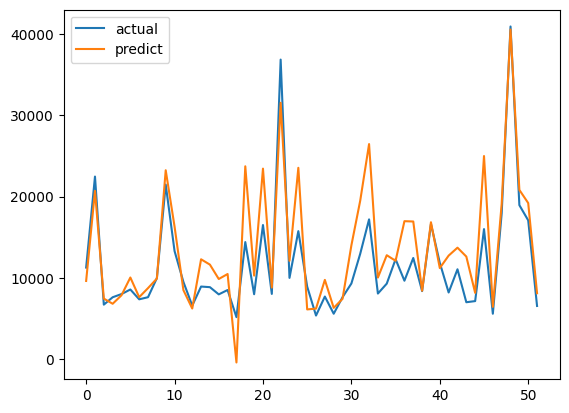

In [73]:
plt.plot(df_2)
plt.legend(["actual","predict"])

# plt.figure(figsize=(10,8))
# plt.plot(df_2[:50])
# plt.legend(["Actualy","predicted"]);

# Lasso Model

In [82]:
from sklearn.linear_model import Lasso
lass = Lasso()
lass.fit(x_train,y_train)



Lasso()

In [83]:
lass.score(x_train,y_train)

0.8332873365993465

In [84]:
lass.score(x_test,y_test)

0.7121364300915741

In [85]:
lass.intercept_

11452.150926051721

In [86]:
lass.coef_

array([ -421.20929741,   -34.58109752,  1438.43576562,  2350.58133929,
        3658.04649129, -1149.31524962,  2037.8810717 , -2914.48661228,
        1731.62060732,  1802.74145015,  -887.56770029])

In [87]:
pd.DataFrame(lass.coef_,cars.columns[:-1],columns=['coeficients'])

,coeficients
wheelbase,-421.209297
carlength,-34.581098
carwidth,1438.435766
curbweight,2350.581339
enginesize,3658.046491
boreratio,-1149.315250
horsepower,2037.881072
citympg,-2914.486612
highwaympg,1731.620607
drivewheel,1802.741450


In [89]:
y_pred_3 = lass.predict(x_test)

In [92]:
df_3 = pd.DataFrame({"y_test":y_test,"y_pred":y_pred_3})

In [93]:
df_3.head(10)

,y_test,y_pred
0,11259.0,9359.122255
1,22470.0,20422.770225
2,6692.0,7609.547689
3,7603.0,6750.895512
4,7995.0,8339.997422
5,8558.0,9978.614173
6,7349.0,7663.408577
7,7609.0,8969.867653
8,9960.0,9787.909204
9,21485.0,23045.639757


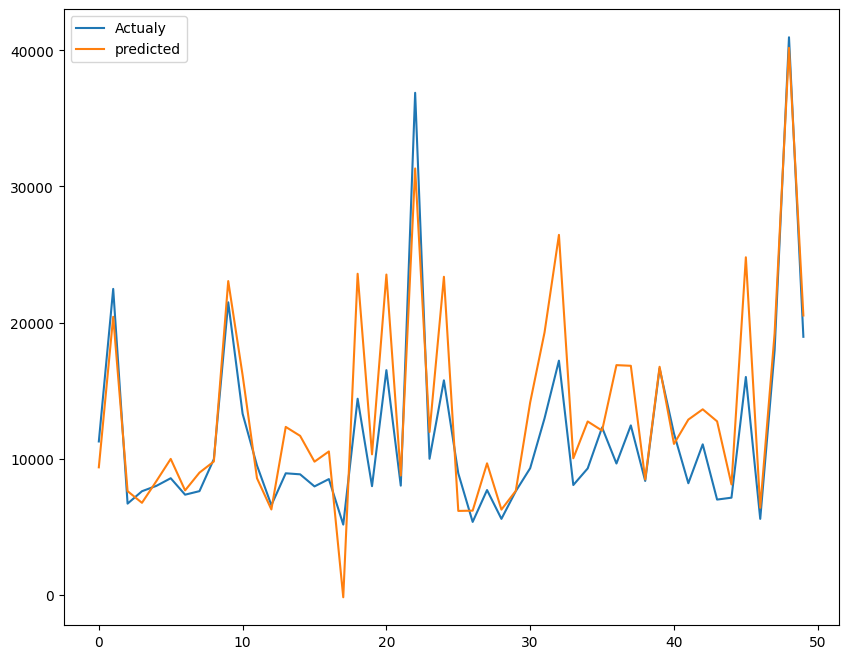

In [94]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actualy","predicted"]);

# Evaluating models


### Linear reg evaluation

In [95]:
#import r2_score 
from sklearn.metrics import r2_score
# from sklearn.metrics import r2_score

In [99]:
# calculate r2_score for the model
lreg_score = r2_score(y_test,y_pred_1)
# reg_score = r2_score(y_test,y_pred_1)
lreg_score

0.7129636289438522

In [106]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1-(1-lreg_score)*(n-1)/(n-p-1)
adj_r2



0.6905707205635854

In [101]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lreg_score

True

In [102]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [103]:
# calculate mean_squared_error
mse = mean_squared_error(y_test,y_pred_1)
mse

13662338.580226948

In [ ]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

In [104]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test,y_pred_1)
mape

0.250933553846636

In [105]:
# calculate root_mean_squared_error
lreg_mse = mean_squared_error(y_test,y_pred_1)
lreg_rmse = np.sqrt(lreg_mse)
lreg_rmse


3696.2600801657545

### Ridge Evaluation

In [107]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.7068551614035963

In [108]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.6839857059102599

In [109]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [111]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

13953089.022180447

In [112]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

2706.0224354462584

In [113]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.2522653830607393

In [116]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(lreg_mse)
rid_rmse

3696.2600801657545

### Lasso Evaluation

In [117]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [118]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.6896789884675125

In [119]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [120]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

13701711.537568262

In [121]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

2694.944532785835

In [122]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

0.2509743998423361

In [124]:
# calculate root_mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(lreg_mse)
lass_rmse

3696.2600801657545

# Comapring The Three Models

In [126]:
models = ["Linear","Ridge","Lasso"]
data = [[lreg_score,lreg_mse],[rid_score,rid_mse],[lass_score,lass_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Linear,0.712964,1.366234e+07
Lasso,0.712136,1.370171e+07
Ridge,0.706855,1.395309e+07
